In [116]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd
import random

from collections import defaultdict
from collections import Counter
import random
import sys
import pickle

sys.path.insert(0,'../decryption')
sys.path.insert(0,'../encryption')
sys.path.insert(0,'../dictionaries')

import encrypt
import decrypt
import alphabet
import frequency

_ALPHABET = " abcdefghijklmnopqrstuvwxyz"

In [117]:
# simulation of problem
TEST_KEY_MAPPING = encrypt.generate_key_mapping()
TEST_CHAR_MAPPING = encrypt.char_key_mapping_from_key_mapping(TEST_KEY_MAPPING)

assert len(set(TEST_KEY_MAPPING)) == 27

TEST_PLAIN_TEXTS = []
with open('../dictionaries/official_dictionary_1_cleaned.txt','r') as f:
    content = f.readlines()
    for line in content:
        TEST_PLAIN_TEXTS.append(line.strip())

TEST_PROBABILITY = 0.1
ciphers = [encrypt.encrypt(msg,TEST_KEY_MAPPING,TEST_PROBABILITY) for msg in TEST_PLAIN_TEXTS]

# pick a random cipher and start working with it. (We should not know the original plain text)
r = random.randint(0,len(ciphers)-1)
cipher_txt = ciphers[r]
test_plain_text = TEST_PLAIN_TEXTS[r]

In [118]:
cipher_txt

'enhtlvegoywisgalvgafycpaclfiykekaklveradflkvbzy ge xspotilfvafykek gevsfvansyhzoiopeeiyvblguspehzsgy lwlkaqsuymgawsluakwyshge mslkyzlzzasgylkva luzvayvlttoopeybalzgjsgy egvlmtszyzsttaaokwyzofpisjakwykyljaglvsyxtlzkisgy pevewbzskmzavaqsgyjhtvazvlwsyhvatsy lkgltoqszyakusrysgymltfigszvzyvlgjklfyzuejtszyza peksulyflzlnlzyjhuztakwakwykeknsgrgmltybssnatylwgmavglty lwakvsuyndsz sgwvpaaksy etsrawtlzzyvlkisgyzslbegvdpakszzyhkaimlkvsgoszvsuylklvpsjlvayqakwyfekuvhfszyvssgmahjzybpsstmlggebtyilmltlzyzvlwklvaefkymgazisvzyfehkvsgftefibazsrypslgvlpzauszyz hrgaehrzteyoyz'

In [119]:
def build_rel_dist(text):
    rel_dist = defaultdict(list)
    rel_num = defaultdict(list)
    for j,c in enumerate(text):
        rel_dist[c].append((j/len(text)))
        rel_num[c].append(j)
    return rel_dist,rel_num

def get_diff(arr):
    diff = []
    for i in range(1,len(arr)):
        diff.append(round(arr[i]-arr[i-1],4))
    return diff

In [122]:
rel_dist_all = [build_rel_dist(text) for text in TEST_PLAIN_TEXTS]
rel_dists = [a[0] for a in rel_dist_all]
rel_nums = [a[1] for a in rel_dist_all]

rel_dist_diffs = [defaultdict(list,{k:get_diff(v) for k,v in dist.items()}) for dist in rel_dists]
rel_num_diffs = [defaultdict(list,{k:get_diff(v) for k,v in dist.items()}) for dist in rel_nums]

c_rel_dist,c_rel_num = build_rel_dist(cipher_txt)

c_rel_dist_diff = defaultdict(list,{k:get_diff(v) for k,v in c_rel_dist.items()})
c_rel_num_diff = defaultdict(list,{k:get_diff(v) for k,v in c_rel_num.items()})


In [140]:
target = 'a'
p_vals = []

c_rel_diff = c_rel_dist_diff[target]
c_rel = c_rel_dist[target]
for c in _ALPHABET:
    rel_diff = rel_dist_diffs[r][c]
    rel = rel_dists[r][c]
    if len(rel) == 0 or len(rel_diff) == 0:
        continue
    if len(rel)>len(c_rel):
        continue
    p_val = stats.ks_2samp(rel,c_rel)[1]
    p_val_diff = stats.ks_2samp(rel_diff,c_rel_diff)[1]
    if p_val>0.9:
        print(c,p_val,p_val_diff,rel_nums[r][c])

g 0.9915300846510168 0.0006769059259295052 [10, 90, 101, 106, 166, 175, 217, 291, 294, 346, 399, 442]
h 0.9539559434656424 1.6730262908160043e-05 [20, 46, 72, 81, 140, 170, 194, 270, 366, 390, 420, 476, 481]
i 0.9999999684582623 0.9145877690736309 [13, 17, 21, 30, 35, 52, 65, 93, 100, 104, 121, 128, 133, 164, 173, 179, 202, 204, 213, 222, 236, 268, 289, 292, 310, 316, 324, 337, 345, 367, 375, 395, 397, 414, 446, 452, 472, 483, 492]
n 0.9551984270684034 0.5303446451619362 [27, 29, 31, 38, 55, 57, 92, 105, 115, 126, 165, 174, 188, 200, 237, 272, 290, 293, 296, 298, 325, 338, 354, 368, 374, 376, 387, 398, 403, 443, 448, 462]
r 0.9999612233725707 0.08613809994917854 [7, 12, 16, 43, 59, 79, 86, 99, 110, 123, 145, 148, 152, 180, 191, 207, 228, 242, 248, 256, 301, 314, 318, 335, 357, 364, 379, 412, 426, 427, 451, 465, 479, 491]
t 0.9338657476107979 0.784723211028722 [5, 15, 32, 39, 51, 61, 64, 127, 132, 135, 153, 182, 196, 203, 212, 215, 221, 251, 254, 317, 326, 336, 352, 365, 377, 382, 389, 

In [135]:
c_rel_diff

[0.0054]

In [136]:
rel_dist_diffs[r]['j']

[]

In [133]:
c_rel

[0.0375, 0.04285714285714286]

In [127]:
rel_diff

[0.222, 0.054, 0.328]

In [129]:
TEST_CHAR_MAPPING

{' ': 'y',
 'a': 'l',
 'b': 'm',
 'c': 'f',
 'd': 'u',
 'e': 's',
 'f': 'x',
 'g': 'w',
 'h': 'p',
 'i': 'a',
 'j': 'c',
 'k': 'i',
 'l': 't',
 'm': 'j',
 'n': 'k',
 'o': 'e',
 'p': ' ',
 'q': 'd',
 'r': 'g',
 's': 'z',
 't': 'v',
 'u': 'h',
 'v': 'n',
 'w': 'b',
 'x': 'r',
 'y': 'o',
 'z': 'q'}

In [ ]:
# strategy: First declare eliminations 
# Then Declare hyperparameters as thresholds. For different values of extra characters, calculate the best
# value of these hyperparameters by running through the solution

# elimination 1: length of rel should be lesser
# elimination 2: top r (hyper param mapped to diff) values of p_vals
# elimination 3: check difference in first character of rel num. it should be less than k (2nd hyper-parameter OR ML input)
# elimination 4: for each term in first and last m (3rd hyperparam) rel dist elements, 
# find closest term and add difference of square from it to total score. Choose letter with lowest such score
#       OR
# Do this for first m terms in rel nums
#       OR
# Calculate some group stats and run a classification ML model. These features can include:
# diff, 1st, 2nd, 3rd ... kth moment of steps of both distributions (k is a hyperparameter)

# In the end, calculate average p value of each guess and output the maximum
# OR calculate score as p value * size in rel num

In [143]:
def iter_tests(p,num):
    """
    iterate over num tests for prob p
    """
    for _ in range(num):
        num_key_mapping = encrypt.generate_key_mapping()
        char_key_mapping = encrypt.char_key_mapping_from_key_mapping(num_key_mapping)

        r = random.randint(0,len(ciphers)-1)
        cipher = encrypt.encrypt(TEST_PLAIN_TEXTS[r],num_key_mapping,p)

        yield r,cipher,char_key_mapping

def append(data,df):
    l = len(df)
    for k,v in data.items():
        df.loc[l,k] = v

In [144]:
def get_data(num,diff,dist,dist_diff,c_num,c_diff,c_dist,c_dist_diff):
    data = dict()

    # get 2,3 moment of num
    max_moments = 3
    for i in range(2,max_moments+1):
        data[str(i)+'_num_moment'] = stats.moment(num,i)
        data[str(i)+'_c_num_moment'] = stats.moment(c_num,i)

    # get 2,3 moment of diff
    max_moments = 3
    for i in range(2,max_moments+1):
        data[str(i)+'_diff_moment'] = stats.moment(diff,i)
        data[str(i)+'_c_diff_moment'] = stats.moment(c_diff,i)

    # get 2,3,4,5 moment of dist
    max_moments = 5
    for i in range(2,max_moments+1):
        data[str(i)+'_dist_moment'] = stats.moment(dist,i)
        data[str(i)+'_c_dist_moment'] = stats.moment(c_dist,i)

    # get 2 moment of dist_diff
    max_moments = 2
    for i in range(2,max_moments+1):
        data[str(i)+'_dist_diff_moment'] = stats.moment(dist_diff,i)
        data[str(i)+'_c_dist_diff_moment'] = stats.moment(c_dist_diff,i)

    # get 3 moment of dist_diff*1000
    data[str(3)+'_dist_diff_moment'] = stats.moment(dist_diff,3) * 1000
    data[str(3)+'_c_dist_diff_moment'] = stats.moment(c_dist_diff,3) * 1000

    # dependant stats
    if num and c_num:
        data['num_p_ks'] = stats.ks_2samp(num,c_num)[1]
    if dist and c_dist:
        data['dist_p_ks'] = stats.ks_2samp(dist,c_dist)[1]
    if diff and c_diff:
        data['diff_p_ks'] = stats.ks_2samp(diff,c_diff)[1]
    if dist_diff and c_dist_diff:
        data['dist_diff_p_ks'] = stats.ks_2samp(dist_diff,c_dist_diff)[1]

    # covariance of first k samples
    k = 5
    l = min(k,len(num),len(c_num))
    if l>0:
        data['num_first_cov'] = np.cov(num[:l],c_num[:l])[0][1]
        data['num_last_cov'] = np.cov(num[-l:],c_num[-l:])[0][1]

    l = min(k,len(dist),len(c_dist))
    if l>0:
        data['dist_first_cov'] = np.cov(dist[:l],c_dist[:l])[0][1]
        data['dist_last_cov'] = np.cov(dist[-l:],c_dist[-l:])[0][1]

    l = min(k,len(diff),len(c_diff))
    if l>0:
        data['diff_first_cov'] = np.cov(diff[:l],c_diff[:l])[0][1]
        data['diff_last_cov'] = np.cov(diff[-l:],c_diff[-l:])[0][1]

    l = min(k,len(dist_diff),len(c_dist_diff))
    if l>0:
        data['dist_diff_first_cov'] = np.cov(dist_diff[:l],c_dist_diff[:l])[0][1]
        data['dist_diff_last_cov'] = np.cov(dist_diff[-l:],c_dist_diff[-l:])[0][1]
    return data


In [150]:
def get_best_negative(r,c_rel,rel_dists,n=4):
    """
    choose those characters which we know are hard to predict
    """
    p_vals = []
    for c_p in _ALPHABET:
        rel = rel_dists[r][c_p]
        if len(rel) == 0:
            continue
        if len(rel)>len(c_rel):
            continue
        p_val = stats.ks_2samp(rel,c_rel)[1]
        p_vals.append((p_val,c_p))
    p_vals.sort(key = lambda a: -a[0])
    return [a[1] for a in p_vals[:n]]

def next_choice(closest_p_vals,chosen):
    for char in closest_p_vals:
        if char not in chosen:
            return char
    return random.choice(_ALPHABET)

In [151]:
# create dataset for p = 0.1
df = pd.DataFrame()

# get distributions for plaintexts
rel_dist_all = [build_rel_dist(text) for text in TEST_PLAIN_TEXTS]
rel_dists = [a[0] for a in rel_dist_all]
rel_nums = [a[1] for a in rel_dist_all]

rel_dist_diffs = [defaultdict(list,{k:get_diff(v) for k,v in dist.items()}) for dist in rel_dists]
rel_num_diffs = [defaultdict(list,{k:get_diff(v) for k,v in dist.items()}) for dist in rel_nums]

num_itr = 0
for r_idx,cipher,char_key_mapping in iter_tests(0.1,1000):
    # track progress
    num_itr += 1
    if num_itr % 10 == 0:
        print(num_itr)
    
    rev_mapping = {v:k for k,v in char_key_mapping.items()}
    
    char_diff = len(cipher) - len(TEST_PLAIN_TEXTS[r_idx])
    
    # get distributions for cipher
    c_rel_dist,c_rel_num = build_rel_dist(cipher)
    c_rel_num_diff = defaultdict(list,{k:get_diff(v) for k,v in c_rel_num.items()})
    c_rel_dist_diff = defaultdict(list,{k:get_diff(v) for k,v in c_rel_dist.items()})
    
    for c_c in _ALPHABET:
        c_p = rev_mapping[c_c]
        
        num = rel_nums[r_idx][c_p]
        c_num = c_rel_num[c_c]
        
        dist = rel_dists[r_idx][c_p]
        c_dist = c_rel_dist[c_c]
        
        diff = rel_num_diffs[r_idx][c_p]
        c_diff = c_rel_num_diff[c_c]
        
        dist_diff = rel_dist_diffs[r_idx][c_p]
        c_dist_diff = c_rel_dist_diff[c_c]
        
        data = get_data(num,diff,dist,dist_diff,c_num,c_diff,c_dist,c_dist_diff)
        data['char_diff'] = char_diff
        data['l_c_dist'] = len(c_dist)
        data['l_dist'] = len(dist)
        data['output'] = 1
        append(data,df)
        
        best_negative = get_best_negative(r_idx,c_dist,rel_dists)
        
        chosen = set([c_p])
        while len(chosen)<4:
            c_p = next_choice(best_negative,chosen)
            chosen.add(c_p)
            
            num = rel_nums[r_idx][c_p]
            dist = rel_dists[r_idx][c_p]
            diff = rel_num_diffs[r_idx][c_p]
            dist_diff = rel_dist_diffs[r_idx][c_p]
            
            data = get_data(num,diff,dist,dist_diff,c_num,c_diff,c_dist,c_dist_diff)
            data['char_diff'] = char_diff
            data['l_c_dist'] = len(c_dist)
            data['l_dist'] = len(dist)
            data['output'] = 0
            append(data,df)
            

/var/folders/1x/qc9ydz9s4vd2vjjqzx68nt0m0000gn/T/ipykernel_23504/3057785574.py:56: RuntimeWarning: Degrees of freedom <= 0 for slice
  data['diff_first_cov'] = np.cov(diff[:l],c_diff[:l])[0][1]
/var/folders/1x/qc9ydz9s4vd2vjjqzx68nt0m0000gn/T/ipykernel_23504/3057785574.py:57: RuntimeWarning: Degrees of freedom <= 0 for slice
  data['diff_last_cov'] = np.cov(diff[-l:],c_diff[-l:])[0][1]
/var/folders/1x/qc9ydz9s4vd2vjjqzx68nt0m0000gn/T/ipykernel_23504/3057785574.py:61: RuntimeWarning: Degrees of freedom <= 0 for slice
  data['dist_diff_first_cov'] = np.cov(dist_diff[:l],c_dist_diff[:l])[0][1]
/var/folders/1x/qc9ydz9s4vd2vjjqzx68nt0m0000gn/T/ipykernel_23504/3057785574.py:62: RuntimeWarning: Degrees of freedom <= 0 for slice
  data['dist_diff_last_cov'] = np.cov(dist_diff[-l:],c_dist_diff[-l:])[0][1]
/var/folders/1x/qc9ydz9s4vd2vjjqzx68nt0m0000gn/T/ipykernel_23504/3057785574.py:46: RuntimeWarning: Degrees of freedom <= 0 for slice
  data['num_first_cov'] = np.cov(num[:l],c_num[:l])[0][1]
/

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000


In [152]:
df = df.fillna(0)

In [153]:
df.to_csv('dataset_two.csv',index=False)

In [154]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

In [155]:
print(X.shape)
print(y.shape)

(108251, 35)
(108251, 1)


In [156]:
# build a model
import torch
from torchvision import datasets, models, transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import Dataset, DataLoader, TensorDataset

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.30)
num_feat = X_train_raw.shape[1]

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = torch.from_numpy(scaler.transform(X_train_raw)).float()
X_test = torch.from_numpy(scaler.transform(X_test_raw)).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [157]:
train_dataset = TensorDataset(X_train,y_train) # create your datset
train_dataloader = DataLoader(train_dataset,batch_size=16,shuffle=True) # create your dataloader

In [158]:
test_dataset = TensorDataset(X_test,y_test) # create your datset
test_dataloader = DataLoader(test_dataset,batch_size=16,shuffle=True) # create your dataloader

In [166]:
class NeuralNet(torch.nn.Module): 
    def __init__(self):
        super(NeuralNet,self).__init__()

        self.relu = torch.nn.ReLU()
        
        self.lin1 = torch.nn.Linear(num_feat, 128)
        
        self.lin2 =torch.nn.Linear(128, 64)
        
        self.lin3 =torch. nn.Linear(64, 1)
        
        self.out = torch.nn.Sigmoid()
        
        self.float()
        
    def forward(self, x):
        x = self.lin1(x)
        x = self.relu(x)
        
        x = self.lin2(x)
        x = self.relu(x)
        
        x = self.lin3(x)
        x = self.out(x)
        
        return x

net = NeuralNet()
loss = torch.nn.BCELoss() # pass output, target
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)


In [167]:
train_loss_history = []
test_loss_history = []

In [168]:


epochs = 95
for epoch in range(epochs):
    train_loss = 0.0
    test_loss = 0.0
    for i, data in enumerate(train_dataloader):
        a_inp, a_out = data
        optimizer.zero_grad()
        predicted_output = net(a_inp)
        fit = loss(predicted_output,a_out) # loss(p_out,a_out)
        fit.backward()
        optimizer.step()
        train_loss += fit.item()

    for i, data in enumerate(test_dataloader):
        with torch.no_grad():
            a_inp, a_out = data
            predicted_output = net(a_inp)
            fit = loss(predicted_output,a_out)
            test_loss += fit.item()
            predicted = torch.max(predicted_output.data, 1)

    train_loss = train_loss/len(train_dataloader)
    test_loss = test_loss/len(test_dataloader)
    train_loss_history.append(train_loss)
    test_loss_history.append(test_loss)
    print('Epoch %s, Train loss %s, Test loss %s'%(epoch, train_loss, test_loss))

Epoch 0, Train loss 0.31716067465163794, Test loss 0.24406409354999734
Epoch 1, Train loss 0.22462766908220883, Test loss 0.22022773633743153
Epoch 2, Train loss 0.20336031112359754, Test loss 0.19698469573058408
Epoch 3, Train loss 0.18924177048422672, Test loss 0.18548185420062008
Epoch 4, Train loss 0.17879092853803052, Test loss 0.17985643582450675
Epoch 5, Train loss 0.17089013662651367, Test loss 0.1724020566114596
Epoch 6, Train loss 0.1648933064375219, Test loss 0.16614501875724294
Epoch 7, Train loss 0.1591840509890234, Test loss 0.1643756934845352
Epoch 8, Train loss 0.1544708169840797, Test loss 0.15853175139490497
Epoch 9, Train loss 0.1500979859249767, Test loss 0.15324844405906082
Epoch 10, Train loss 0.14693240877307756, Test loss 0.15111125304267325
Epoch 11, Train loss 0.14392358949811063, Test loss 0.14850964400953995
Epoch 12, Train loss 0.14081850098119578, Test loss 0.14951892779701909
Epoch 13, Train loss 0.13814778984443685, Test loss 0.14461595599707033
Epoch 14

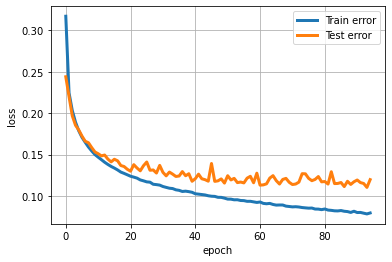

In [169]:
plt.plot(range(len(train_loss_history)),train_loss_history,'-',linewidth=3,label='Train error')
plt.plot(range(len(test_loss_history)),test_loss_history,'-',linewidth=3,label='Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid(True)
plt.legend()

In [170]:
correct = 0
total = 0

for i, data in enumerate(test_dataloader):
    with torch.no_grad():
        a_inp, a_out = data
        predicted_output = net(a_inp)
        p_arr = predicted_output.detach().numpy()
        a_out = a_out.detach().numpy()
        for i in range(len(a_out)):
            if abs(p_arr[i] - a_out[i])<0.5:
                correct += 1
            total += 1

print('accuracy is',correct/total)

accuracy is 0.9568912427638872
